# 

# Analyse van de Impact van Filmeigenschappen op de Omzet

##### Door
### Agus van Huut, Tobias de Vries, Susan Bruggeling
---
- Gekozen dataset: Film
- Targetvariable: gross/omzet
- Gekozen featurevariabelen: num_voted_users, title_year, budget, movie_feesboek_likes, imdb_score

**Onderzoeksvragen:**
1. _In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB?_
2. _In hoeverre kan je voorspellen dat een film een oscar wint op basis van een aantal kenmerken van de film?_
2. _In hoeverre is de omzet van een film te voorspellen op basis van kenmerken die bekend zijn voor het uitbrengen van een film? (Link met mojo) moet met knn_
3. _In hoeverre is het mogelijk om logische clusters te vinden o.b.v. onder andere budget en omzet? Denk aan blockbusters (hoog budget en hoge omzet), flops (hoog budget en lage omzet) of cultfilms (laag budget en hoge omzet). Je mag extra features toevoegen._ **todo: formateer deze vraag**

extra:
Is er een correlatie te vinden tussen het uitgeefjaar van een film en het genre. 

extra in hoeverre is de rating van een film te voorspellen op basis van een film  kolom met een boolean ipv van een tekstveld met meerdere genres
- datatypes veranderen naar het geschikte datatype (zie nieuwe cel onder business understanding)
- uitleg mark variabel jaar: kijk naar verschillende manieren (uitschieters verwijderen/houden, inflatie meerekenen/negeren om te zien wat de beste resultaten geeft)


gekozen variabelen:

- num_ciritic_for_reviews : A 

- num_user_for_review : S

- imdb_score T

- movie_facebook_likes S

- budget: agus

- gross: agus

- title year: tobias

- num_voted_users: Susan

- genre: tobias

## Business Understanding

De film industrie is gigantisch, met heel veel consumenten. Het maken van een film is een grote onderneming die veel geld kost. Als het product flopt - veel minder opbrengt dan de film heeft gekost, zijn de verliezen groot. Het is daarom belangrijk voor investeerders om de kans op een populair product te vergroten. Deze investeerders zijn dus een belangrijke stakeholder als het gaat om het analyseren van films. Dit is voornamelijk het geval wanneer de analyse betrekking heeft tot de populariteit en de opbrengsten. 

Daarnaast is en relatief groot deel van de consumenten is erg betrokken bij het product. Daarom zijn ook relatief veel consumenten van films geïnteresseerd. Analyses van deze sector kunnen veel publiek trekken, wat ook zeer waardevol kan zijn.

## Data Understanding

Het is van belang te weten welke data tot beschikking is. Hieronder voeren we eerst een analyse uit voor de gehele verzameling. Op basis van deze kleine analyse kiezen we een aantal variabelen die ons interessant lijken. Na dit onderdeel gaan we een analyse uitvoeren op per iedere gekozen variabele.

Het is ook belangrijk af te gaan welke aannamens wij over de data hebben gedaan en te controleren of deze correct zijn of niet. Wij hebben het vermoeden dat deze dataset bevooroordeeld en geen goede weerspiegeling van de werkelijkheid is. Onze aanname is dat de meeste films in de dataset een tamelijk grote bekendheid hebben. Daarnaast denken wij ook dat bekendheid gecorreleerd is met succes. Dit zou betekenen dat onze dataset een onevenredige hoeveelheid aan succesverhalen heeft.

Het is interessant om te onderzoeken of dit ook werkelijk zo is. Als dit het geval blijkt te zijn hoeft dit niet te betekenen dat de dataset onderzoeken niet interessant is. De groep films die dan overgerepresenteerd is, films met een grote bekendheid, zijn heel interessant voor grote mediabedrijven, aangezien hun producten in deze groep vallen. 

Daarnaast is het belangrijk te weten wat de data betekent, om te begrijpen hoe de modellen werken en wat de uitkomst betekent. 

### Analyse complete dataset

In [1]:
# Command to enable 3d widgets
%matplotlib notebook 

# Imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib_venn import venn3, venn3_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics
import sklearn.tree as tree

We gaan eerst kijken waar onze data uit bestaat. Dit gaan we doen door te kijken hoeveel meetwaardes er zijn en wat voor type data hier in staat.

In [2]:
# Colors for visualistion
pastl_colors = sns.color_palette('pastel')[0:10]

# Loads the movie dataset.
movie_df = pd.read_csv("movie.csv", delimiter=",")

# Sets the amount of columns to display to max.
pd.set_option('display.max_columns', None)
movie_df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2309,Color,Alejandro Monteverde,45.0,106.0,38.0,975.0,Cary-Hiroyuki Tagawa,1000.0,6420319.0,Drama|War,Tom Wilkinson,Little Boy,15978,5705,Michael Rapaport,0.0,NaN,http://www.imdb.com/title/tt1810683/?ref_=fn_t...,122.0,English,Mexico,PG-13,20000000.0,2015.0,1000.0,7.4,2.35,15000
4770,Color,Jack Heller,26.0,90.0,0.0,120.0,Katherine Waterston,322.0,NaN,Mystery|Thriller,Shaun Sipos,Enter Nowhere,5025,630,Christopher Denham,3.0,cabin|going in circles|pac man|stranger|woods,http://www.imdb.com/title/tt1631707/?ref_=fn_t...,45.0,English,USA,R,500000.0,2011.0,178.0,6.6,NaN,701
4884,Color,Kristin Rizzo,6.0,90.0,30.0,670.0,Robert Davi,699.0,NaN,Documentary,Esai Morales,Give Me Shelter,37,3967,Elaine Hendrix,0.0,independent film,http://www.imdb.com/title/tt2559658/?ref_=fn_t...,2.0,English,USA,NaN,250000.0,2014.0,683.0,8.0,NaN,199
658,Color,Tom Hooper,488.0,158.0,0.0,11000.0,Eddie Redmayne,20000.0,148775460.0,Drama|Musical|Romance,Hugh Jackman,Les Misérables,243834,46204,Anne Hathaway,1.0,barricade|innkeeper|parole|rebellion|student,http://www.imdb.com/title/tt1707386/?ref_=fn_t...,845.0,English,USA,PG-13,61000000.0,2012.0,13000.0,7.6,1.85,144000
1498,Color,Ridley Scott,147.0,117.0,0.0,567.0,Albert Finney,883.0,7458269.0,Comedy|Drama|Romance,Archie Panjabi,A Good Year,70698,3611,Richard Coyle,1.0,based on novel|inheritance|provence|uncle|wine,http://www.imdb.com/title/tt0401445/?ref_=fn_t...,196.0,English,USA,PG-13,35000000.0,2006.0,883.0,6.9,2.35,9000


De dataset bestaat uit 28 kolomen. Een groot aantal van deze kolomen zijn kwantitatieve waardes. We hebben het budget en de omzet van elke film, maar ook een aantal waardes zoals het aantal facebook likes van de film, van de acteurs en van de regisseur. Deze kolomen zien er best interessant uit. Er zijn ook meetpunten, zoals aspect ratio en het aantal hoofden in de poster, die er niet interessant uitzien. Deze waardes zijn waarschijnlijk ongerelateerd aan andere meetwaardes. Hier gaan wij niet veel aandacht aan besteden.

Er zijn ook een aantal nominale waardes die niet in categorieën te plaatsen zijn, zoals namen en IMDB link.

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

We kunnen aan de datatypes zien dat niet alle datatypes correct zijn. Voor veel waardes waar een integer logischer zou zijn. Ook is duidelijk dat de genres in een onbruikbaar formaat staan opgeslagen. Als we de genres willen analyseren moeten we deze eerst omzetten in een bruikbaar formaat.

Daarnaast zien we dat er een hoop missende waardes zijn onder verschillende meetwaardes. Wanneer we een van die variabelen willen gebruiken moeten we die eerst compleet maken.

Voordat we dat gaan doen, kijken we eerst naar de centrumwaardes van de verschillende meetwaardes. 

In [4]:
movie_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


We zien dat de spreiding van facebook likes heel groot is, met waarschijnlijk veel hoge uitschieters. Dit lijkt ook het geval te zijn met het aantal gebruikers beoordelingen. Het aantal professionele beoordelingingen (num_critics_for_reviews) heeft ook hoge uitschieters, maar deze liggen minder ver van het midden af.

De duration heeft een evenredigere spreiding, al lijkt deze ook uitschieters aan de hoge kant te hebben. Aspect ratio lijkt ons niet interessant om te onderzoeken.

Het budget en de omzet hebben allebei een groot bereik, van een paar duizend tot bijna een miljard. Iets dat opvalt is dat het budget een grotere max waarde heeft dan de opbrengsten.


De correlaties tussen de verschillende meetwaardes zijn ook handig om te weten. Die gaan we later bekijken.

Voordat we dat gaan doen gaan we kijken of films dubbel opgeslagen staan in onze database.

In [5]:
counts = movie_df["movie_imdb_link"].value_counts()

len(counts[counts > 1])

117

Er zijn 117 films die dubbel (of driedubbel) in de database staan.

In [6]:
movie_df = movie_df.drop_duplicates(subset=["movie_imdb_link"], keep="first")

movie_df["movie_imdb_link"].value_counts().max()

1

De dubbele waardes zijn weg.

In [7]:
counts = movie_df["movie_title"].value_counts()
len(counts[counts > 1])

2

Er zijn wel twee films met dezelfde naam. We moeten opletten dat dit niet voor problemen gaat zorgen. 

### Externe Dataset Toevoegen

Voor onderzoeksvraag 2 gaan we kijken of we kunnen voorspellen of een film een oscar gaat winnen of niet. Hiervoor hebben we een dataset met vrijwel alle uitgereikte oscars door de jaren heen. 

In [8]:
oscars = pd.read_csv("the_oscar_award.csv")

oscars.sample(10)

,year_film,year_ceremony,ceremony,category,name,film,winner
9691,2014,2015,87,FILM EDITING,Sandra Adair,Boyhood,False
8962,2008,2009,81,FOREIGN LANGUAGE FILM,Germany,The Baader Meinhof Complex,False
6123,1982,1983,55,SHORT FILM (Live Action),"Jan Saunders, Producer",Split Cherry Tree,False
3250,1956,1957,29,WRITING (Screenplay--Adapted),Tennessee Williams,Baby Doll,False
5166,1973,1974,46,SHORT SUBJECT (Animated),"Frank Mouris, Producer",Frank Film,True
10164,2018,2019,91,ANIMATED FEATURE FILM,Mamoru Hosoda and Yuichiro Saito,Mirai,False
6529,1986,1987,59,MAKEUP,"Michael G. Westmore, Michèle Burke",The Clan of the Cave Bear,False
49,1928,1929,2,ART DIRECTION,William Cameron Menzies,Alibi;,False
7806,1998,1999,71,ART DIRECTION,Art Direction: Martin Childs; Set Decoration...,Shakespeare in Love,True
9837,2015,2016,88,MUSIC (Original Song),Music and Lyric by Jimmy Napes and Sam Smith,Spectre,True


In [9]:
oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10395 non-null  int64 
 1   year_ceremony  10395 non-null  int64 
 2   ceremony       10395 non-null  int64 
 3   category       10395 non-null  object
 4   name           10395 non-null  object
 5   film           10091 non-null  object
 6   winner         10395 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 497.5+ KB


We weten van een paar oscars niet bij welke film hij hoort. Deze kunnen we net zo goed weggooien. Daarnaast moeten we de kolom film hernoemen naar movie_title om met ons andere dataframe overeen te komen.

Daarnaast zijn er een paar films waarvan we de naam niet weten. De naam gaan we niet gebruiken als feature, dus het is zonde de hele film weg te gooien. We moeten de waarde wel opvullen als we de datasets op de titel willen linken. Daarom gaan we deze waarde vullen met "N/A".

In [10]:
movie_df["movie_title"].fillna("N/A", inplace=True)

In [11]:
counts = movie_df["movie_title"].value_counts()
counts.head()

The Host            2
Out of the Blue     2
Avatar              1
The Rose            1
Glitter             1
Name: movie_title, dtype: int64

In [12]:
oscars.dropna(how="any", inplace=True)

# Drops all oscar nominations that have not won
oscars = oscars[oscars["winner"]]

oscars.loc[(oscars["film"] == oscars["film"]) & (oscars["year_film"] != oscars["year_film"]), :].shape

(0, 7)

Er zijn geen twee films met dezelfde naam die een oscar gewonnen hebben. Hier hoeven we dus geen rekening mee te houden.

In [13]:
# Drops all oscars but one for each film.
oscars.drop_duplicates("film", keep="last", inplace=True)

oscars.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
11,1927,1928,1,DIRECTING (Comedy Picture),Lewis Milestone,Two Arabian Knights,True
21,1927,1928,1,OUTSTANDING PICTURE,Paramount Famous Lasky,Wings,True
22,1927,1928,1,UNIQUE AND ARTISTIC PICTURE,Fox,Sunrise,True


In [14]:
# Rename column names to match meaning in new dataset.
oscars = oscars.rename({"film" : "movie_title", "winner" : "oscar"}, axis=1)
# We only select the columns we need.
oscars = oscars[["movie_title", "oscar"]]

def quick_clean(movie_data):
    """strips a string and turns all characters to lower caps."""
    return movie_data.lower().strip()

# Cleans the name of the movie title in both datasets.
oscars["movie_title"] = oscars["movie_title"].apply(quick_clean)
movie_df["movie_title"] = movie_df["movie_title"].apply(quick_clean)

# Merges the two datasets on the movie title.
movie_df = pd.merge(movie_df, oscars, on="movie_title", how="left") 
movie_df["oscar"] = movie_df["oscar"].fillna(False)

print(movie_df.shape)

movie_df["oscar"].isna().sum()

(4919, 29)


0

### Analyse met Externa Dataset

Tot slot gaan we een heatmap van de correlatie tusssen de verschillende meetwaardes maken. Meetwaardes met hoge correlatie met budget of het winnen van een oscar, de target variabelen van de onderzoeksvragen, zijn waardevol bij het maken van een voorspellend model.

<IPython.core.display.Javascript object>


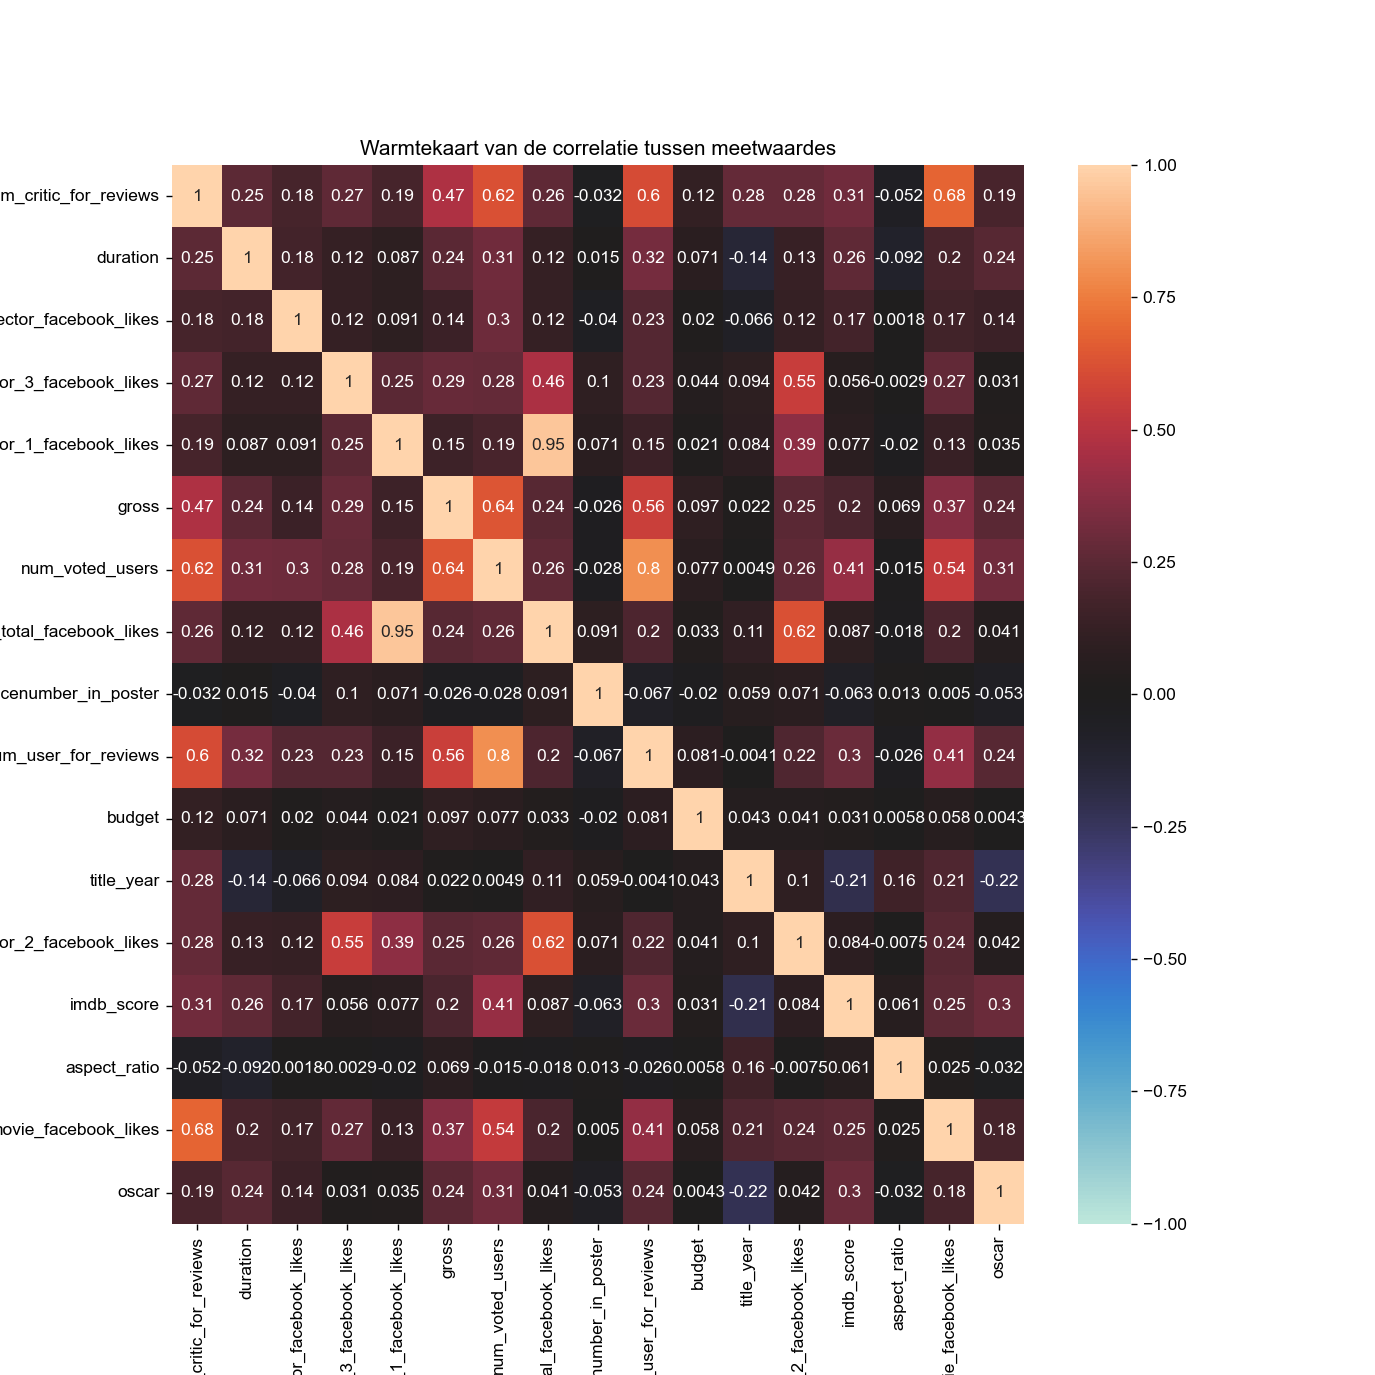

Text(0.5, 1.0, 'Warmtekaart van de correlatie tussen meetwaardes')

In [15]:
fig, ax = plt.subplots(figsize=(11,11))  

sns.heatmap(movie_df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.title("Warmtekaart van de correlatie tussen meetwaardes")

Sommige variabelen hebben vrijwel geen correlaties. Andere waardes hebben juist correlaties met meerdere andere waardes. Dit kan indicatief zijn van belangrijkere en minder belangrijke waardes voor het maken van een voorspellend model. Waardes met lage correlaties werken waarschijnlijk meer als ruis, terwijl waardes met hoge correlaties juist predicatief zijn (bron zoeken hiervoor). Daarnaast is de waarde ook indicatief van de betrouwbaarheid van het voorspellende model. Een waarde met alleen zeer zwakke correlaties zal waarschijnlijk geen sterk voorspellend model kunnen genereren. (Bron zoeken)

### Analyse en cleaning van de gekozen variabelen



#### Splitsen van de Dataset
Met dit onderzoek willen we meerdere dingen uitzoeken. We willen namelijk zowel het budget als het winnen van een oscar voorspellen, en clusters vinden in de data. 

Bij sommige meetwaardes zullen we tegenkomen dat we deze anders willen schoonmaken voor hen ene onderzoek dan voor het andere. Daarom splitsen we hier het dataframe op in drie. Per variabele wordt toegelicht of we deze aan een van deze dataframes toewijzen en hoe deze schoon wordt gemaakt. 

In [16]:
def normalised_dataframe(data_frame):
    """Normalises a selected portion of a dataframe.
    
    Returns the normalised dataframe in a copy.
    
    Parameters
    ----------
    columns : [string]
        Columns of movie_df to normalise.
        
    Returns
    -------
    pd.Dataframe :
        The normalised dataframe.
    """
    scaler = MinMaxScaler() 
    scaled_array = scaler.fit_transform(data_frame) 
    
    return pd.DataFrame(scaled_array, columns=columns,index=movie_df.index)

In [17]:
movie_sub = movie_df[['gross','budget','title_year','imdb_score','num_voted_users','genres']].copy()
movie_sub.head()

,gross,budget,title_year,imdb_score,num_voted_users,genres
0,760505847.0,237000000.0,2009.0,7.9,886204,Action|Adventure|Fantasy|Sci-Fi
1,309404152.0,300000000.0,2007.0,7.1,471220,Action|Adventure|Fantasy
2,200074175.0,245000000.0,2015.0,6.8,275868,Action|Adventure|Thriller
3,448130642.0,250000000.0,2012.0,8.5,1144337,Action|Thriller
4,NaN,NaN,NaN,7.1,8,Documentary


Voordat we de data kunnen gebruiken, moeten we die eerst opschonen. We beginnen met het wegwerken van de missende waardes van alle data die we willen gebruiken in ons model.

In [18]:
movie_df.isna().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       485
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
oscar                          0
dtype: int64

Er zijn behoorlijk veel missende waardes. Een aantal daarvan zitten in kolomen die we niet mee nemen in dit onderzoek. Deze kunnen we het beste verwijderen.

In [19]:
cols_del = ["aspect_ratio", "cont"]

#### IMDB Score 

IMDB score is de gemiddelde score die een film heeft ontvangen op de website IMDB. Op deze website kan iedereen een film beoordelen met een cijfer tussen de 1 en de 10. De IMDB score is het gemiddelde van al deze scores, afgerond op 1 punt achter de decimaal.

Deze score geeft voornamelijk aan hoeveel de kijkers de film leuk vonden. Dit kan zich vertalen naar een groter publiek, maar dat gebeurd niet altijd. In de correlatie heatmap kan je zien dat er een kleine correlatie tussen de imdb-score en de opbrengsten van de film lijkt te zijn. Daarnaast komt hij indirect genoemd in de eerste onderzoeksvraag. Daarom hebben wij ervoor gekozen om deze variabele op te schonen, zodat we het effect op het model kunnen beoordelen. 

Als de IMDB Score niet interessant blijkt voor het voorspellen van de opbrengsten van een film, blijft het een interessante variabelen, omdat er is grote interesse in het voorspellen van een goed onthaal van een film. Wij gaan in dit onderzoek verder niet in op het voorspellen van de IMDB Score.

Deze variabele is discreet, omdat de waardes altijd binnen een beperkte range vallen. Deze range is van 1 tot en met 100. Daarnaast kan de variabele zowel afhankelijk als onafhankelijk zijn. Een voorbeeld van wanneer de waarde onafhankelijk is, is wanneer je bijvoorbeeld zou kijken naar de opbrengsten van de film. Een voorbeeld van deze variabele als afhankelijk, kan zijn wanneer je de score van de film zou voorspellen op basis van bijvoorbeeld de director of de cast.

##### Analyse

<IPython.core.display.Javascript object>


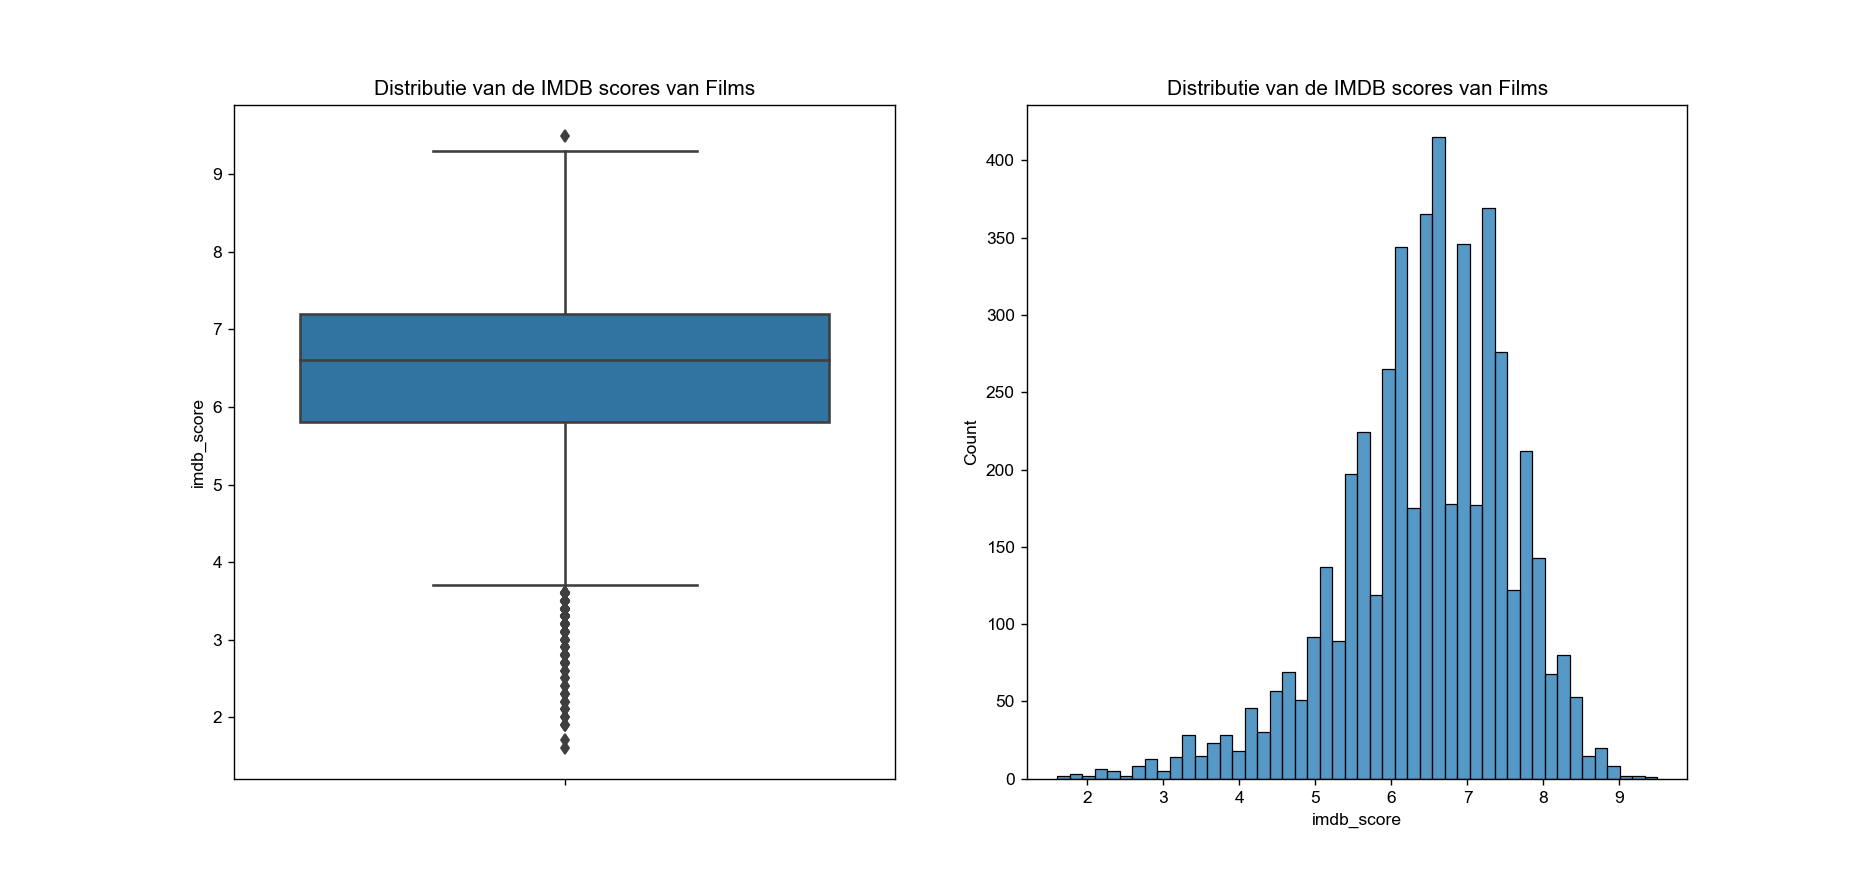

Text(0.5, 1.0, 'Distributie van de IMDB scores van Films')

In [20]:
imdb_score = movie_df["imdb_score"]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) 

# Plots boxplot
sns.boxplot(data=movie_df, y="imdb_score", ax=ax[0])
ax[0].set_title("Distributie van de IMDB scores van Films")

# Plots histrogram
sns.histplot(data=movie_df, x="imdb_score", ax=ax[1])
ax[1].set_title("Distributie van de IMDB scores van Films")

##### Cleaning

In [21]:
imdb_score.isna().sum()

0

Er zijn geen lege waardes voor de IMDB score. Deze is dus in ieder geval compleet. We weten al dat alle waardes in de geldige  zijn. In de histogram hebben we gezien dat alle waardes tussen de 1 en de 10 liggen. 

Ook weten we dat het datatype nu een float is, waar dit beter door een integer gerepresenteerd kan worden. De scores zijn op 1 decimaal significant, dus we moeten het product van tien en de score nemen. Dit gaan we als eerste doen.

In [22]:
movie_df["imdb_score"] = movie_df["imdb_score"] * 10
movie_df["imdb_score"] = movie_df["imdb_score"].astype(int)

movie_df["imdb_score"].info()

<class 'pandas.core.series.Series'>
Int64Index: 4919 entries, 0 to 4918
Series name: imdb_score
Non-Null Count  Dtype
--------------  -----
4919 non-null   int32
dtypes: int32(1)
memory usage: 57.6 KB


Voordat we doorgaan naar de volgende meetwaarde, gaan we de uitschieters onderzoeken. Uitschieters kunnen namelijk het voorspelend vermogen van ons model negatief beïnvloeden. 

In [23]:
outliers_imdb = movie_df[abs(stats.zscore(imdb_score)) >= 3]
outliers_imdb.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,45.000000,45.000000,45.000000,45.000000,46.000000,2.800000e+01,46.000000,46.000000,46.000000,46.000000,4.300000e+01,45.000000,45.000000,46.000000,38.000000,46.000000
mean,49.711111,94.600000,105.644444,270.511111,680.369565,1.500951e+07,19452.456522,1875.956522,1.347826,181.652174,2.001436e+07,2005.133333,412.177778,25.173913,2.376579,1687.630435
std,49.998919,15.803337,192.190856,222.721965,445.027208,1.686800e+07,25621.781510,1352.410424,2.131430,253.105179,1.998155e+07,7.310018,272.087660,3.906145,2.282101,9102.115140
min,1.000000,60.000000,0.000000,0.000000,12.000000,3.067150e+05,105.000000,12.000000,0.000000,1.000000,1.735000e+04,1981.000000,0.000000,16.000000,1.780000,0.000000
25%,9.000000,86.000000,8.000000,81.000000,461.750000,4.759968e+06,967.750000,913.000000,0.000000,19.000000,4.300000e+06,2003.000000,193.000000,22.000000,1.850000,0.000000
50%,29.000000,93.000000,49.000000,227.000000,671.000000,8.246158e+06,5361.000000,1524.000000,0.500000,62.000000,1.700000e+07,2006.000000,383.000000,27.000000,1.850000,177.000000
75%,80.000000,97.000000,92.000000,434.000000,891.500000,1.943366e+07,29313.750000,2719.750000,2.000000,300.250000,2.450000e+07,2010.000000,623.000000,28.000000,2.350000,549.500000
max,174.000000,143.000000,892.000000,782.000000,3000.000000,7.300094e+07,89687.000000,6539.000000,11.000000,1308.000000,8.400000e+07,2015.000000,919.000000,30.000000,16.000000,62000.000000


De uitschieters in de data zijn representatief voor de realiteit.

In de volgende afbeelding is de distributie van imdb scores door Tom Moertel berekent. 

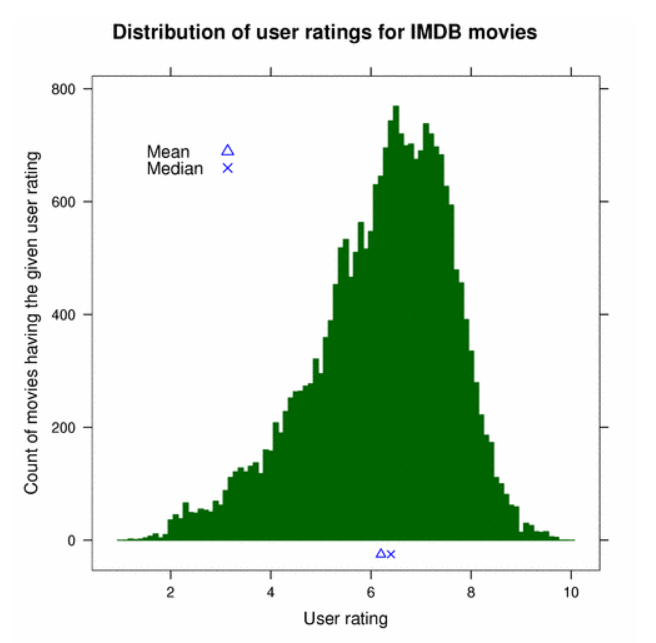

(apa bron notatie zetten!!) https://blog.moertel.com/posts/2006-01-17-mining-gold-from-the-internet-movie-database-part-1.html

De distributie die hier te zien is, is vrijwel identiek aan onze. We kunnen met meer zekerheid stellen dat onze data representatief is in dit opzicht.

#### Aantal Professionele Beoordelingen

Deze waarde staat voor het aantal reviews, dit geeft aan hoeveel mensen een review hebben achtergelaten voor een film online. Attribuut num_ciritic_for_reviews is een kwalitatief feature variabel voor het onderzoeksvraag 1, dit attribuut bevat vijftig nan wij denken omdat dit een feature variabel inblaast van alle nan weg halen om te ruilen voor 0.  

bij het Cleaning hebben we gezien dat er vijftig NaN waarden bevatten. Hiernaast staan het datatype in een float dit is onnodig want aantal review kunnen niet in comma getallen zijn daarom wordt het data type verandert naar int 64. 

In [24]:
movie_df['num_critic_for_reviews'] = movie_df['num_critic_for_reviews'].fillna(0) 
# zorgt ervoor dat NaN values veranderen naar 0

In [25]:
# converting 'num_critic_for_reviews' from float to int
movie_df['num_critic_for_reviews'] = movie_df['num_critic_for_reviews'].astype(int)

<IPython.core.display.Javascript object>


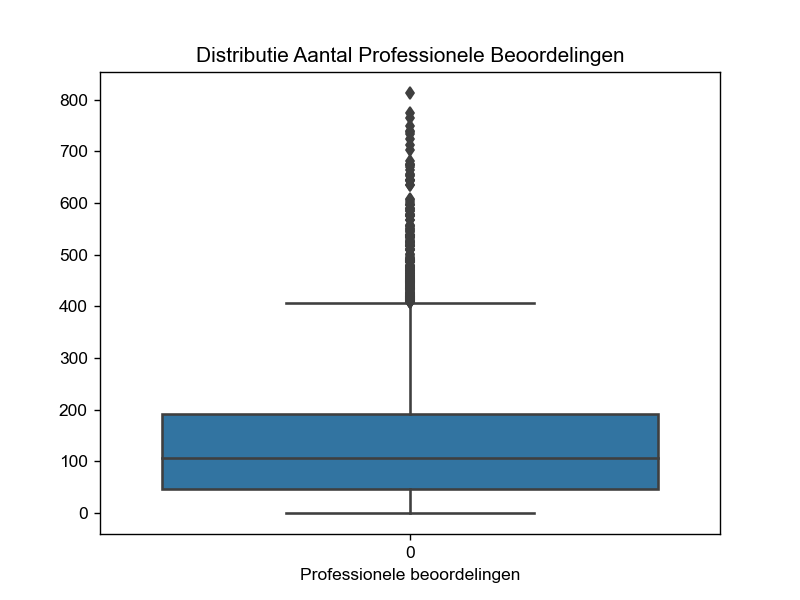

Text(0.5, 0, 'Professionele beoordelingen')

In [26]:
movie_num_critic_for_reviews = movie_df["num_critic_for_reviews"]

fig, ax = plt.subplots()
    
sns.boxplot(data=movie_num_critic_for_reviews)
ax.set_title("Distributie Aantal Professionele Beoordelingen")
ax.set_xlabel("Professionele beoordelingen")

In [27]:
movie_num_critic_for_reviews.describe()

count    4919.000000
mean      136.635495
std       120.435835
min         0.000000
25%        47.000000
50%       107.000000
75%       191.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

<IPython.core.display.Javascript object>


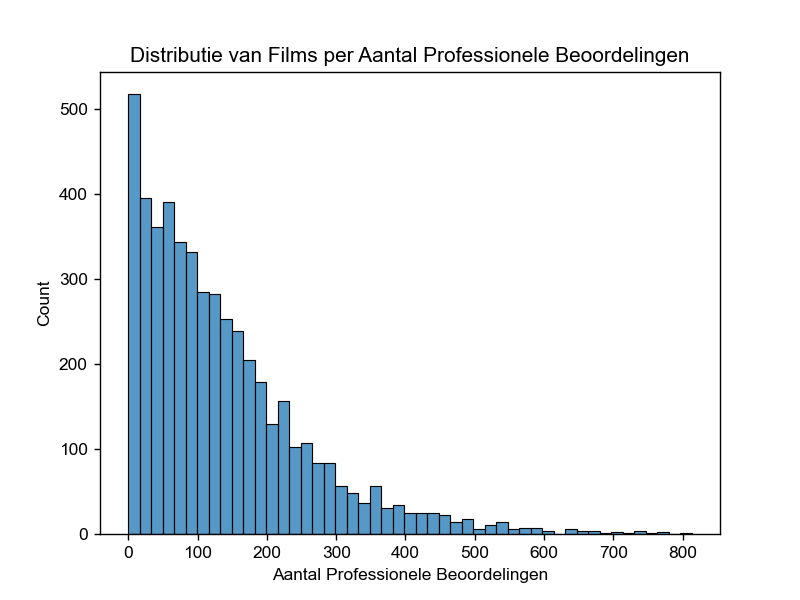

Text(0.5, 0, 'Aantal Professionele Beoordelingen')

In [28]:
fig, ax = plt.subplots()
    
sns.histplot(data=movie_num_critic_for_reviews)

ax.set_title("Distributie van Films per Aantal Professionele Beoordelingen")
ax.set_xlabel("Aantal Professionele Beoordelingen")

#### Facebook Likes

Facebook likes staat voor het aantal likes die de film heeft ontvangen op zijn Facebookpagina. Facebook het meest gebruikte sociale media platform van de afgelopen decennia en staat nog steeds op nummer 1. Het aantal keren dat de film geliked is op facebook is indicatief van hoe populair hij is. 

Een blinde plek van de data is wel dat deze niet wereldwijd representatief is. Het gebruik van facebook is bijvoorbeeld illegaal in China, wat wel een grote markt is van de filmindustrie. Dit deel van de sector komt dus niet terug in deze variabele. 

Deze blinde plek is niet groot genoeg om de data erg te vertekenen. Wij denken dat deze meetwaarde erg interessant om verder te bekijken voor onderzoeksvraag 1 om de omzet te voorspellen. In de correlatie heatmap zien we dat er een correlatie tussen het aantal likes en de opbrengst te vinden is. Wij willen het effect van dit datapunt op het model die de opbrengst moet voorspellen gaan bekijken.

In de eerdere anlyse hebben we ook gezien dat het aantal facebook likes, het aantal gebruikers beoordelingen en het aantal stemmen van gebruikers erg op elkaar lijken in distributie. We gaan deze waardes samen doorzoeken. Daarom wachten we met de analyse tot we alle variabelen hebben toegelicht. 

#### Aantal Stemmen - Gebruikers

Het aantal gebruikers die gestemd hebben geeft het aantal gebruikers aan die voor of tegen de film hebben gestemd op een online platform. Het is niet bekend welke platformen dit zijn. 

Deze waarde is een indicator voor de populariteit en bekendheid van een film. Aangezien de informatie van deze waarde niet platform gebonden is, is deze ook robuster met een representatievere demografie dan bijvoorbeeld de eerder aan bod gekomen aantal facebook likes.

We hebben gezien in de heatmap van de correlaties van de meetwaardes binnen de film dataset, dat deze meetwaarde een hoge correlatie heeft met de opbrengsten van de film en het winnen van een oscar. Wij denken dat dit door dezelfde redenen als toegelicht onder aantal facebook likes wordt veroorzaakt: populariteit betekend meer omzet. Een oscar nominatie betekent meer populariteit. 

#### Aantal Beoordelingen door Gebruikers

Deze meetwaarde geeft het aantal beoordelingen die zijn achtergelaten door gebruikers op (online) platformen weer. 

Deze variabel heeft een zeer hoge correlatie met de omzet (Gezien in de eerder getoonde heatmap), een waarde die we willen voorspellen. Daarom gaan we deze waarde klaar maken om verder mee te werken.

We hebben eerder gezien dat er geen lege waardes voorkomen onder deze meetwaarde. Het datatype, wat nu een float is, is echter niet optimaal. Dit kunnen we beter veranderen naar een Int64. Voordat we de data gaan opschonen, gaan we eerst controleren of er nog andere onzuiverheden te vinden zijn.

##### Analyse

Het aantal facebook likes geeft iets aan over de populariteit van een film. Het zegt ook wat over de bekendheid. Een bekendere film is meestal vaker bekeken. Daarom denken wij dat er een positieve correlatie is tussen de omzet en het aantal facebook likes. Wij verwachten ook een positieve correlatie tussen het winnen van een oscar en het aantal facebook likes, omdat een oscar een film bekendheid geeft.

Hetzelfde geldt voor het aantal reviews en het aantal beoordelingen door gebruikers. Deze waardes zijn ook, in tegenstelling tot het aantal facebook likes, vrij robust tegen een vertekening van de waardes door een niet representatieve groep waaronder de data wordt verzameld. Dit komt omdat deze data over meerdere platforms wordt verzameld.

<IPython.core.display.Javascript object>


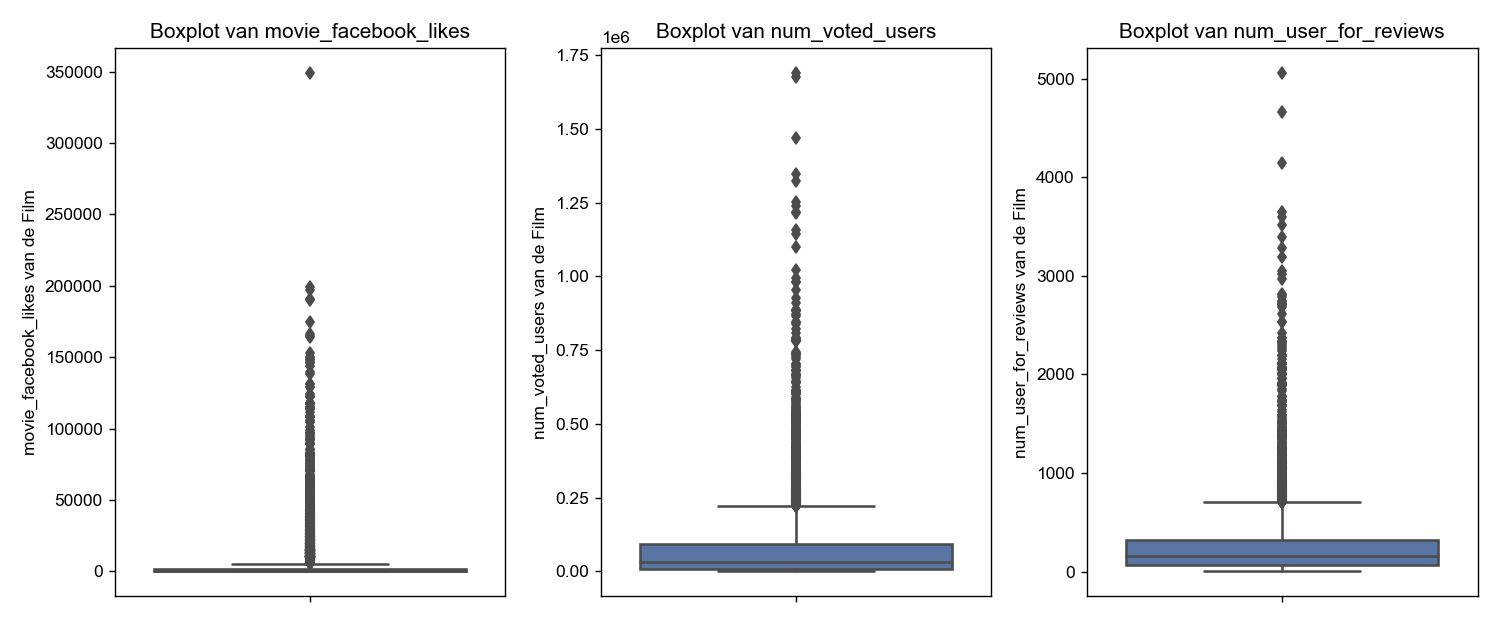

In [29]:
cols = ["movie_facebook_likes", "num_voted_users", "num_user_for_reviews"]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
sns.set_theme(style="whitegrid")

# Plots a boxplot for each column in a seperate plot.
for i, parameter in enumerate(cols):
    sns.boxplot(data=movie_df, y=parameter, ax=ax[i])
    ax[i].set_ylabel("{} van de Film".format(parameter))
    ax[i].set_title("Boxplot van {}".format(parameter))
    
plt.tight_layout()

We kunnen direct aan de boxplot zien dat er heel veel hoge uitschieters zijn. Door deze uitschieters kan je niet goed zien waar de kwartielen beginnen, maar het is duidelijk dat we niet te maken hebben met normaalverdelingen.

In [30]:
movie_df[cols].describe()

,movie_facebook_likes,num_voted_users,num_user_for_reviews
count,4919.000000,4.919000e+03,4898.000000
mean,7345.293556,8.261820e+04,267.603512
std,19200.708189,1.382858e+05,372.839155
min,0.000000,5.000000e+00,1.000000
25%,0.000000,8.356500e+03,64.000000
50%,160.000000,3.315800e+04,153.500000
75%,2000.000000,9.375750e+04,320.000000
max,349000.000000,1.689764e+06,5060.000000


Met uitzondering van het aantal gebruikers beoordelingen is het gemiddelde een paar tientallen keren groter dan de mediaan. Dit betekent dat de uitschieters de data behoorlijk beinvloeden.

<IPython.core.display.Javascript object>


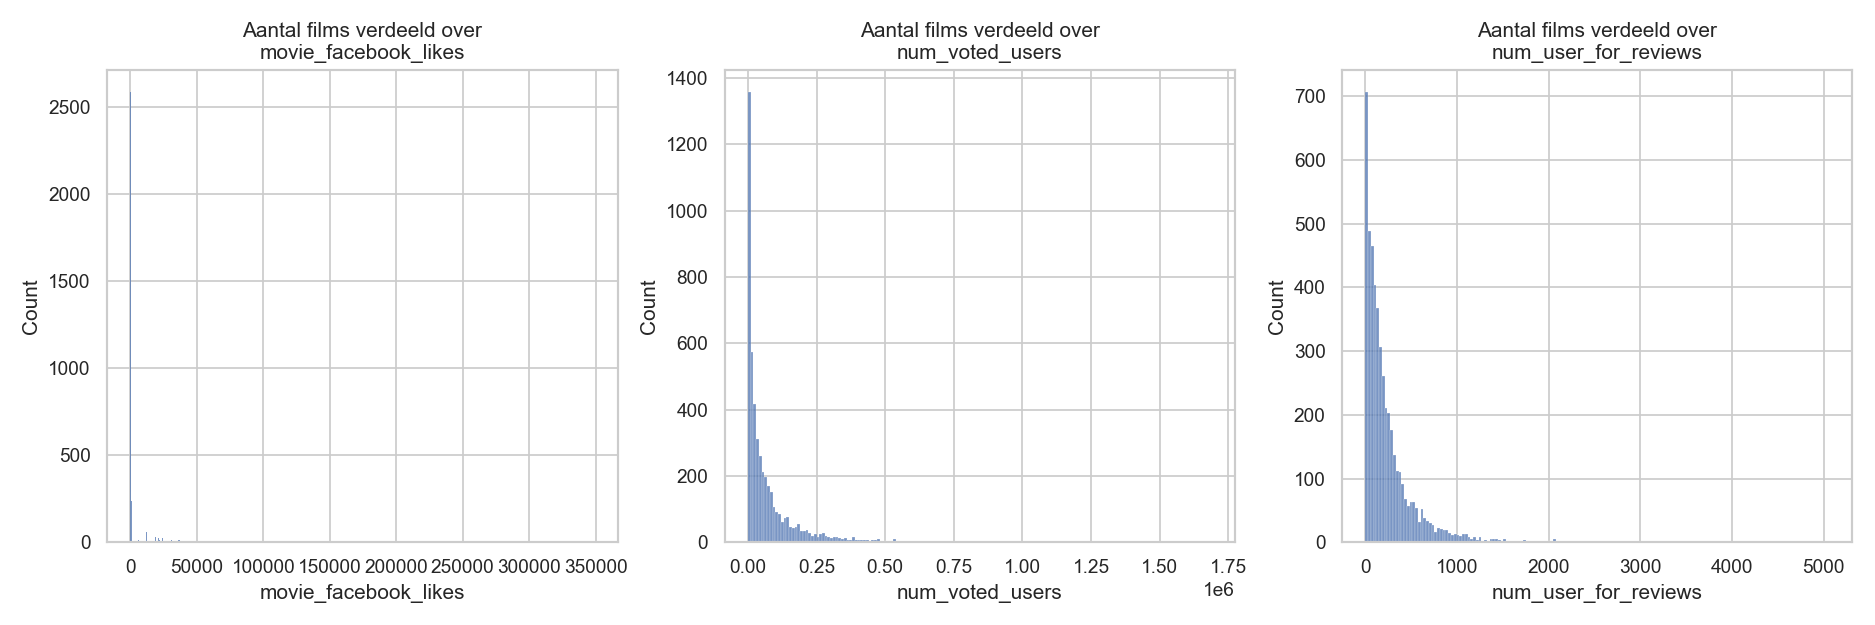

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.set_theme(style="whitegrid")

# Plots a boxplot for each column in a seperate plot.
for i, parameter in enumerate(cols):
    sns.histplot(data=movie_df, x=parameter, ax=ax[i])
    ax[i].set_title("Aantal films verdeeld over\n{}".format(parameter))
    
plt.tight_layout()

Het aantal movie_facebook likes is heel onevenredig verdeeld. Meer dan 25 % van de data heeft de waarde 0. Wij dachten dat deze meetwaarde een goede indicator zou zijn, maar nu verwachten we er minder van. We nemen deze dataset wel mee, omdat we aan de hand van deze grafieken ook niet kunnen uitsluiten dat het indicatief kan zijn voor het budget.

Er is duidelijk sprake van een logaritmische verdeling voor alle meetwaardes. Aangezien alle meetwaardes redelijk overeen komen in de distributie van de data, ga ik onderzoeken of de uitschieters van de verschillende meetwaardes overeen komen. We hebben het vermoeden dat de groep uitschieters voornamelijk uit hele succesvolle films bestaan. Dit maakt het een interessante groep om verder te bekijken.

Het kan slim zijn nog iets te doen met het aantal facebook likes en het aantal gebruikers die gestemd hebben, aangezien die uitschieters de data erg vertekenen. Voordat we dit gaan doen, gaan we de data in zijn algemeen schoonmaken en verder analyseren.

##### Cleaning 
We kunnen ook zien dat er geen negatieve waardes zijn, of waardes die zo groot zijn dat dit duidelijk fout is. We gaan controleren of er missende waardes zijn.

In [32]:
movie_df[cols].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 0 to 4918
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_facebook_likes  4919 non-null   int64  
 1   num_voted_users       4919 non-null   int64  
 2   num_user_for_reviews  4898 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 282.8 KB


Het aantal facebook likes en het aantal gebruikers die op de film gestemd hebben missen beide geen waardes. De datatypes van beide waardes is een integer, wat we ook niet hoeven te veranderen.

Voor het aantal mensen die een film hebben beoordeeld mist wel een paar waardes. Daarnaast is het datatype een float, wat we naar een integer willen veranderen. 
We gaan de missende waardes vervangen met 0. Het is aannemelijk dat de films waar we geen data over het aantal beoordelingen hebben kunnen vinden, weinig tot geen beoordelingen hebben ontvangen.

In [33]:
# Sets all NaN values to 0 in num_user_for_reviews
movie_df["num_user_for_reviews"].fillna(0, inplace=True)

# Changes datatype
movie_df["num_user_for_reviews"] = movie_df["num_user_for_reviews"].astype(int)

In [34]:
movie_df[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4919 entries, 0 to 4918
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   movie_facebook_likes  4919 non-null   int64
 1   num_voted_users       4919 non-null   int64
 2   num_user_for_reviews  4919 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 263.5 KB


In [35]:
counts = movie_df["movie_title"].value_counts()
len(counts[counts > 1])

3

We missen geen waardes meer en alle meetwaardes zijn het goede datatype.

##### Correlatie analyse
De uitschieters kunnen de data erg vertekenen als deze niet representatief van de realiteit zijn, of fouten in de data. Daarom gaan we deze verder onderzoeken. We denken dat het een groep films zijn die een groot succes waren. Zulke films komen uit, dus als ze niet worden overgerepresenteerd in onze dataset kunnen we ze beter houden.

We gaan eerst kijken naar de correlatie tussen de drie meetwaardes.

<IPython.core.display.Javascript object>


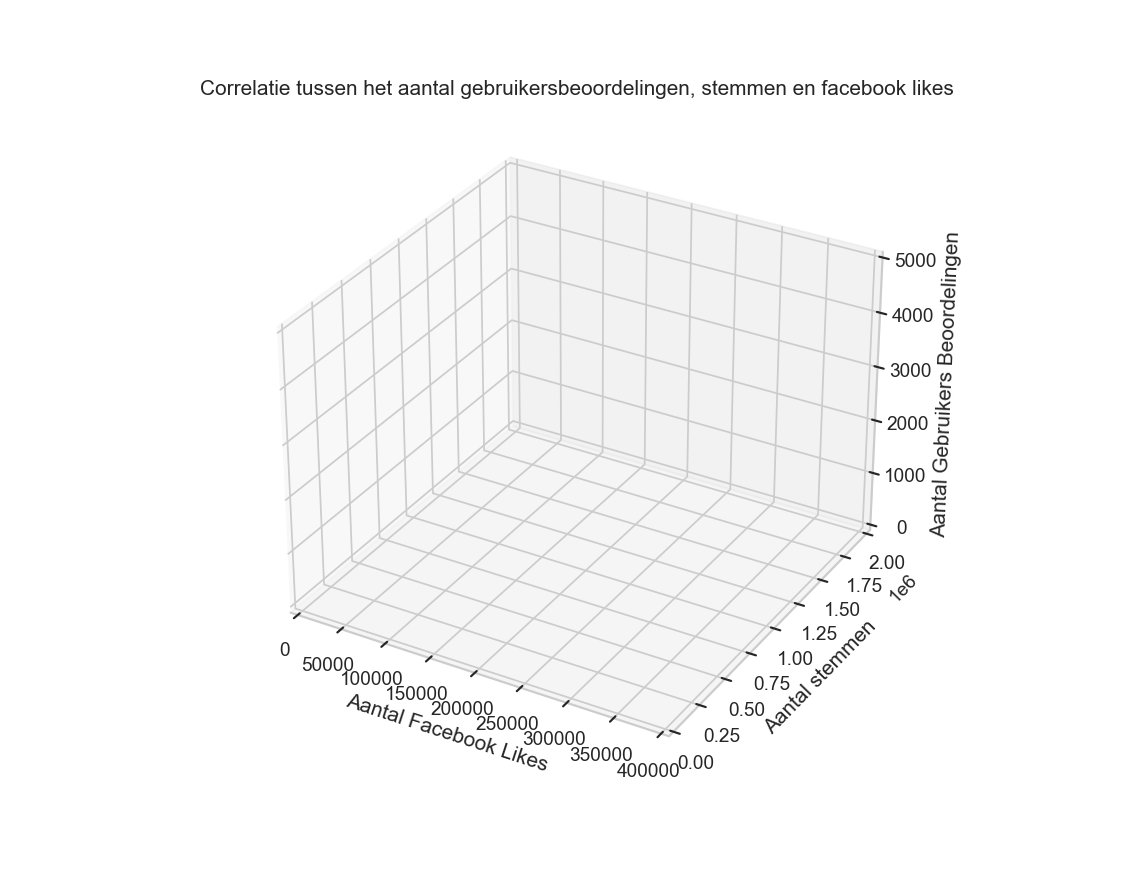

NameError: name 'columns' is not defined

In [37]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "whitegrid")

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection = '3d')

x, y, z =tuple(map((lambda x : movie_df[x]), cols))

ax.set_xlabel("Aantal Facebook Likes")
ax.set_ylabel("Aantal stemmen")
ax.set_zlabel("Aantal Gebruikers Beoordelingen")
ax.set_xlim3d(0, 400000)
ax.set_ylim3d(0, 2000000)
ax.set_zlim3d(0, 5000)
ax.set_title("Correlatie tussen het aantal gebruikersbeoordelingen, stemmen en facebook likes")

ax.scatter(x, y, z, sizes=normalised_dataframe(movie_df[["gross"]].dropna()))

plt.show()

Er is een correlatie te zien tussen het aantal stemmen en het aantal gebruikers beoordelingen. 

De correlatie tussen het aantal stemmen en het aantal facebook likes en de correlatie tussen het aantal gebruikers beoordelingen en het aantal facebook likes zijn een stuk zwakker.

In [ ]:
sns.set_theme(style="white")
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

for i, parameter in enumerate(cols):
    sns.scatterplot(x="gross", y=parameter,palette="muted", alpha=.1, data=movie_df, ax=ax[i])
    ax[i].set_xlabel("Totale Omzet")
    ax[i].set_ylabel("{} van de Film".format(parameter))
    ax[i].set_title("{} van Films\nGedistributeerd over de Omzet.".format(parameter))
    
    plt.tight_layout()

Het aantal stemmen en het aantal gebruikers beoordelingen is gecorreleerd met de omzet.

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax2 = plt.subplots(nrows=1, ncols=3, figsize=(16,7))

for i, parameter in enumerate(cols):    
    sns.boxplot(data=movie_df, x="oscar", y=parameter, ax=ax2[i])
    ax2[i].set_xlabel("Oscar Gewonnen")
    ax2[i].set_ylabel("{} van de Film".format(parameter))
    ax2[i].set_title("Boxplot van {}\nvan Films met en Zonder Oscar".format(parameter))
    plt.tight_layout()

Dit volgt aardig onze verwachting. Het aantal films met een oscar hebben een hogere mediaan, gemiddelde en interkwartiel afstanden van het aantal facebook likes. Ook gaat de omzet gemiddeld omhoog naarmaten de film meer facebook likes heeft ontvangen.

De data is schoon en alle meetwaardes lijken een correlatie te hebben met beide van onze targets. Het aantal facebook likes scoort slechter voor beide targets dan de andere twee meetwaardes. 

Voordat we doorgaan met de volgende meetwaardes toelichten, willen we de groep uitschieters van deze variabelen verder bekijken. Onze voornaamste vraag is of deze uitschieters representatief voor de relatiteit zijn. Daarnaast willen we de groep verder analyseren om te kijken of hier waardevolle informatie instaat.

In [ ]:
outliers = list()

for i, parameter in enumerate(cols):
    outliers.append(movie_df[abs(stats.zscore(movie_df.loc[:, parameter])) >= 3])
    print("{} heeft {} uitschieters".format(parameter, outliers[i].shape[0]))

show_cols = cols.copy()
show_cols += ["movie_title", "gross", "oscar"]

outliers[0].sort_values(cols[0], ascending=False).head(10)[show_cols]

In [ ]:
outliers[1].sort_values(cols[1], ascending=False).head(10)[show_cols]

In [ ]:
outliers[2].sort_values(cols[2], ascending=False).head(10)[show_cols]

Ons vermoeden lijkt te zijn bevestigd. Dit zijn allemaal films die een groot succes waren. Deze waardes lijken vooral erg te correleren met een hoge omzet.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

for i, parameter in enumerate(cols):
    sns.histplot(data=outliers[i], x="gross", ax=ax[i])
    ax[i].set_xlabel("Omzet")
    ax[i].set_title(parameter)
    
plt.tight_layout()

Het procentuele aantal van films met hoge opbrengsten is veel hoger in de uitschieter data.

In [ ]:
votes_likes_review_overlap = pd.concat(outliers, axis=1, join="inner")

votes_likes_review_overlap.sample(10)

In [ ]:
# TODO: venn diagram fixen
#venn3(subsets=(outliers_num_reviews, outliers_num_voted, outliers_fb_likes), set_labels=("reviews", "voted", "likes"))

Al deze films zijn enorme blockbusters geweest. Ze zijn zeer interessant om nader te bekijken, maar waarschijnlijk niet handig om allemaal mee te nemen bij het maken van een voorspellend model. (afhankelijk van procentuele opmaak werkelijkheid en dataset). Daarnaast staan The Avengers en Skyvall twee keer in de dataset. We kunnen alles het beste controleren op dubbele titels.

Het is zaak om te checken of het percentage populaire films in onze database overeenkomt het het percentage populaire films in de werkelijkheid. Op het moment dat dit niet het geval is, is het slim (een deel van) de uitschieterdata te verwijderen om hopelijk een dataset te creeeren die meer overeenkomt met de werkelijkheid.

#### Title Year 

Dit variabel representeert het jaar waarin de desbtreffende film is uitgekomen.
Dit variabel is onafhankelijk omdat het niet beinvloed wordt door andere viarabelen in deze verzameling. Het meetniveau is discreet omdat er sprake is van een rangorde en gelijke stappen (jaartal).
We hebben dit variabel gekozen omdat het ons intressant lijkt om de veranderingen van variabelen te onderzoeken door de jaren heen.



##### Analyse

In [ ]:
# Create refrence to column for easy access and readabillity
year = movie_df["title_year"]

# Describe variable and show amount of movies without year
print(year.describe())
print("\nMissing values: " + str(year.isnull().sum()))

Hier kunnen we zien dat het datatype een float is. Dit is niet logisch aangezien jaartallen een volledig getal zijn. In data cleaning zullen we dit veranderen naar een integer type. Er zijn 105 films waarbij geen jaartal wordt vermeld.

Hieronder zullen we deze variabel met een paar visualisaties analyseren.

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(data=year)

ax.set_title("Boxplot Jaar van Uitkomst")

In [ ]:
fig, ax = plt.subplots()

sns.histplot(data=year)

ax.set_title("Aantal Films per Jaar")

In [ ]:
movie_df[year.isna()].sample(100)

#### Gross 

Dit variabel representeert alle inkomen dat is binnengehaald voor de film, de gemiddelde omzet van een film is 48,46 miljoen. Dit variabele is een afhankelijk variabel omdat de omzet is de variabel waar wij de voorspelling van gaat meten, de meetniveau die hierbij horen zijn discreet. Wij hebben dit variabel gekozen omdat wij willen onderzoeken in hoeverre is de omzet van een film  te voorspellen.

In [ ]:
gross = movie_df['gross']
gross.describe()

Hierbij is te zien dat de omzet datatypen float, wij denken dat dit niet logisch is omdat de omzet bevat geen cijfers achter de comma en daarom gaan wij bij data cleaning dit veranderen naar een integer.  Hiernaast hebben wij ook opgemerkt dat in de top 20 hoogste omzet allemaal films uit landen als japan en Korea en India en bijna geen film uit de vs. Wij denken dat het data die wij hebben gekregen niet op dezelfde currency staan daarom gaan we bij het volgende stap de data omzetten naar een currency. Bij dit data zijn er 884 films waarbij de null values bevatten. 

In [ ]:
gross = movie_df['gross']
gross.isna().sum()

In [ ]:
cols = ["gross", "country"]

movie_df[cols].groupby("country").describe()

Een of meer waardes hebben "Official site" of "New Line" als hun land staan. Dit is geen land dus deze data klopt niet. Daarnaast is er een film geproduceerd in West Duitsland. Deze waarde is lastig om mee te werken als we alle geldwaardes om willen zetten naar de US dollar. We gaan deze daarom omzetten naar Duitsland.

In [ ]:
movie_df[movie_df["country"] == "Official site"]

In [ ]:
movie_df[movie_df["country"] == "New Line"]

Country Strong is in de VS geproduceerd. Daarom gaan we nu het land veranderen naar USA. Town & Country is ook in de VS geproduceerd. Het werd gedistributeerd door New Line Cinema, een bedrijf in Hollywood.

In [ ]:
movie_df.loc[(movie_df["country"] == "Official site") |  (movie_df["country"] == "New Line"), "country"] = "USA"

In [ ]:
movie_df[(movie_df["country"] == "Official site") | (movie_df["country"] == "New Line")]

In [ ]:
movie_df.loc[movie_df["country"] == "West Germany", "country"] = "Germany"

In [ ]:
movie_df[cols].groupby("country").describe()

De totale opbrengsten missen voor best veel waardes. 843 waardes om precies te zijn. Dit zijn er best veel. In het licht van de onderzoeksvragen kunnen we niet anders dan ze weggooien. Door hier andere waardes in te vullen zullen we de data bevuilen in een gebied waar dit totaal niet kan, namelijk het gebied dat we willen voorspellen.

In [ ]:
movie_df = movie_df.dropna(subset=["gross"], how="any")

In [ ]:
print(movie_df.shape)
movie_df.info()

We weten nu van elke film uit welk land ze komen. Nu kunnen we de waardes onder omzet en budget omzetten naar dezelfde geldsom in Amerikaanse Dollars. Hiervoor gebruiken we de exchange rates van 2022, zoals gepubliceerd op https://data.oecd.org/conversion/exchange-rates.htm. 

In [ ]:
exchanges = pd.read_csv("currency_exchange.csv")

exchanges.groupby("LOCATION").describe()

Er staan meerdere jaren aan data in de koersen dataset. We gaan de munteenheid niet historisch corrigeren. Ook de inflatie door de jaren heen laten we buiten beschouwing. We gaan alle geld waardes omzetten naar de US dollar waarde met de gemiddelde koers over 2021. Deze eenheid is alleen voor DEW niet bekend. We gaan later controleren of we DEW gebruiken.

In [ ]:
groups = exchanges.groupby(by="LOCATION")
exchanges = groups.apply(lambda g: g[g['TIME'] == g['TIME'].max()])

Het lijkt erop dat alle landen die de euro hebben geadopteerd apart in de dataset worden bijgehouden. Deze landen zouden in 2021 allemaal dezelfde koers moeten hebben. We gaan even controleren of dit het geval is.

In [ ]:
exchanges.loc[exchanges["LOCATION"] == "EU27_2020"]["Value"]

In [ ]:
exchanges.sort_index(axis=1, inplace=True)

euro_value = float(exchanges.loc[exchanges["LOCATION"] == "EU27_2020"]["Value"])
exchanges.loc[exchanges.loc[:, "Value"]==euro_value, :]

De koers van de euro staat geregistreerd onder elk land dat de euro geadopteerd heeft. Hier hoeven we dus niet meer naar om te kijken.

De munteenheid wordt in de meeste gevallen weergegeven met een drie letterige code. We gaan een dataset met ISO 3166 codes met bijbehordende landsnamen inladen. Als we deze land codes toevoegen aan de film data, kunnen we makkelijk de juiste koers linken aan de film uit het juiste land.

In [ ]:
country_codes = pd.read_csv("ISO_3166-1_alpha-3.csv", delimiter=":")
country_codes

movie_df = pd.merge(movie_df, country_codes, on="country", how="left")
movie_df.sample(15)

In [ ]:
movie_df["ISO-code"].isna().sum()

Alle landen hebben een ISO 3166 code. We gaan nu proberen de munt koersen te linken.

In [ ]:
exchanges.drop(labels=["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "TIME", "Flag Codes"], axis=1, inplace=True)

In [ ]:
exchanges.rename({"LOCATION" : "ISO-code", "Value": "currency_exchange_rate_2021"}, axis=1, inplace=True)

movie_df = pd.merge(movie_df, exchanges, on="ISO-code", how="left")

movie_df.sample(5)

In [ ]:
movie_df.groupby("country")["currency_exchange_rate_2021"].describe()

Bij elk land staat nu de gemiddelde koers genoteerd. Er zijn geen afwijkende waardes, want het minumum en het maximum van elk land is hetzelfde. Dit betekent dat er dezelfde koers voor iedere film in hetzelfde land is genoteerd. 

We gaan nu de waarde van de omzet en het budget van iedere film omzetten naar de equivalente waarde in US dollars. 

In [ ]:
movie_df["budget_usd"] = movie_df["budget"] / movie_df["currency_exchange_rate_2021"]
movie_df["gross_usd"] = movie_df["gross"] / movie_df["currency_exchange_rate_2021"]

movie_df[["gross", "budget", "budget_usd", "gross_usd"]].describe()

Nu de waardes zijn gecorrigeerd, is de maximum waarde van het budget een stuk lager komen te liggen. De minimum waardes zijn te laag. Je kan geen film maken met een paar dollar. Het lijkt erop dat het omzetten van de opbrengsten en het budget naar de US dollar volgens de koers over 2021 goede en slechte resultaten met zich meebrengt.

In [ ]:
movie_df.sort_values("budget_usd").head()

In [ ]:
movie_df.sort_values("budget_usd", ascending=False).head()

De recente films hebben nu een goede weergave van waarde. De waarde van oude films was misschien al vertekend en is dat nu in ieder geval. Vooral buitenlandse films waarvan de waarde van de munt van het land flink is gedaald na de uitkomst van de film hebben een erg vertekende waarde nu. Een Iranese film heeft volgens de berekening een budget van 0.20 dollar. Dit kan natuurlijk niet kloppen. We zouden kunnen proberen de data historisch kunnen corrigieren, maar dit is waarschijnlijk meer moeite dan dat het waard is.

#### Budget

Dit variabel representeert alle kosten die de film heeft uitgegeven om het te maken, het gemiddelde budget van een film is 3,975 miljoen hierbij moet je ook rekening houden met dat niet alle currency hetzelfde zijn hierdoor kan de gemiddelde omhoog halen. Dit variabel is een onafhankelijk variabel omdat wij denken dat budget een oorzaak variabel is voor de omzet. De bijbehorende meetniveau is discreet. 


In [ ]:
budget = movie_df['budget']
budget.describe()

In [ ]:
budget = movie_df['budget']
budget.isna().sum()

Hierbij is te zien dat het budget datatypen float bevat wij denken dat dit niet logisch is omdat de omzet bevat geen cijfers achter de comma en daarom gaan wij bij data cleaning dit veranderen naar een integer. Hiernaast zijn Bij dit data 884 films waarbij de null values bevatten. Daarnaast bij het budget is de data niet op een currency waardoor dit moet worden omgezet naar een currency.


#### Genre

Omdat het lastig om het variabel 'genre' te analyseren zullen we een kolom toevoegen voor elke unieke genre. Bijvoorbeeld waarde 'Fantasy|Horror' moet veranderen naar een kolom 'Fantasy' en een kolom 'Horror' met elk een 'true'. Elke genre kolom bevat een boolean als indicatie of de film wel of niet onder het desbetreffende genre valt.

##### Cleaning

In [ ]:
movie_df.sample(10)

Je kan in de sample data zien dat ieder unieke genre is toegevoegd als een kolom. De films hebben een True waarde bij de genres die ze hebben en staan overal anders op False.

In [ ]:
genre_count = dict()
for index, genres in zip (movie_df.index, movie_df["genres"]):
    temp_genre = genres.split(sep='|')
    for genre in temp_genre:
        if genre not in genre_count:
            genre_count[genre] = 1
            movie_df[genre] = False
        else:
            genre_count[genre] += 1
        movie_df.at[index, genre] = True

genre_count

##### Visualisatie

In [ ]:
def sort_dict_value(unsorted_dict):
    """Sorts a dictionary by its value in descending order."""
    # source: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    return dict(sorted(unsorted_dict.items(), key=lambda item: item[1], reverse=True))

genre_count = sort_dict_value(genre_count)

fig, ax = plt.subplots(figsize=(20, 5))
# 5043 is the total amount of movies in the dataframe.
sns.barplot(x=list(genre_count.keys()), y=[(amount / 5043) * 100 for amount in genre_count.values()])

plt.xlabel("Genre")
plt.ylabel("Percentage of movies")
plt.tight_layout()

In [ ]:
movie_df["num_voted_users"]

In [ ]:
cols_to_drop = ["color", "facenumber_in_poster", "actor_1_name", "actor_2_name", "actor_3_name", "movie_imdb_link", "aspect_ratio", "plot_keywords"]

movie_df.drop(cols_to_drop, axis=1, inplace=True)

movie_df.info()

In [ ]:
plt.scatter(movie_df["gross"], movie_df["budget"])

### Conclusie Data Analyse



## Onderzoeksvraag 1 - Voorspellen van de Omzet

We willen de omzet voorspellen aan de hand van beoordelingen op (online) platformen. We gaan ons vrijwel alleen focussen op meetwaardes die de populariteit van de film of eigenschappen van de film op online platformen meet.

Om deze vraag te beantwoorden hebben we een lineaire regressie model gekozen. Een lineair regressie model voorspelt een continue target aan de hand van een of meerdere continue features. Al onze tot nu toe gekozen features zijn kwantitatief, net als onze target. Daarom lijkt dit model een goede keuze. 

### Base Case
Voordat we een model gaan maken, gaan we onze basecase bedenken. Als basecase nemen we de mediaan van de omzet voor iedere gok. Ons voorspellende model moest significant beter werken dan dat.

We gaan een lijst aanmaken waarin we de resultaten van de basecase en alle modellen plaatsen zodat we deze resultaten laten kunnen berekenen.

In [ ]:
test_results = list()
y = movie_df["gross_usd"]

np.median(movie_df.loc[:, "gross_usd"])

De mediaan is 25 miljoen dollar. We gaan berekenen hoe goed de voorspellingen zijn als we dit altijd voorspellen.

In [ ]:
y_base = y[:800]
X_base = movie_df["gross_usd"][:800]
median_base = np.full(800, np.median(X_base))

print(np.sqrt(metrics.mean_squared_error(y_base, median_base)))

metrics.r2_score(y_base, median_base)

Een r2 score van 0 betekent dat een model het net zo goed doet als het gemiddelde gokken. De mediaan heeft een negatieve score, wat betekent dat het een slechtere voorspelling is dan het gemiddelde. 

We kunnen dus beter het gemiddelde als basecase nemen. De r2 score is dan ook makkelijk te vergelijken, aangezien die 0 is voor het gemiddelde.

We gaan de RMSE en de r2 van de basecase aan de testresultaten toevoegen, zodat we deze later makkelijk kunnen vergelijken.

In [ ]:
mean_base = np.full(800, np.mean(X_base))

test_results.append((np.sqrt(metrics.mean_squared_error(y_base, mean_base)), 0))

Nu gaan we een aantal modellen maken met verschillende feature variabelen.

### Lineaire Regressie Modellen

Om deze modellen te maken gebruiken we de bibliotheek SKLearn. Het model wordt gemaakt aan de hand van een training dataset, waarna we het model gaan testen met een test dataset. 

We gaan het model testen door de RMSE, Root Mean Square Error, en de r2 waarde te berekenen. De RMSE staat voor de standaardafwijking van de voorspellingen ten opzichte van de werkelijke waardes. De r2 waarde is de verbetering in totale afwijking ten opzichte van het gemiddelde gokken. 

In [ ]:
def test_lin_reg(data_X, data_y, random_state=12345):
    """
    Trains a Linear Regression Model and tests it with the RMSE and R2 value.
    
    Splits the Data into a training and testing portion.
    Trains a linear regression model with the test set. Predicts the test values and
    measures the accuracy of the prediction with the Root Mean Square Error calculation
    and the R2 value.
    Root Mean Square Error stands for the average distance from the prediction to the
    target.
    R2 is a measure of the standard deviation from the prediction, compared to predicting
    the mean value.
    
    Parameters
    ----------
    data_X :
        Data of the features.
    data_y :
        Target data.
    random_state :
        Random state of the training and test set.
    
    Returns:
    --------
    float:
        RMSE value of the trained linear regression model.
    float :
        R2 Value of the trained linear regression model.
    """
    # Creates a Linear Regression Model.
    reg = LinearRegression()

    # Splits the data into a test and a train portion.
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, random_state=random_state)

    # Fits the training dataset to the model.
    reg.fit(X_train, y_train)

    # Predicts the values according
    y_pred = reg.predict(X_test)

    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    
    return rmse, r2


def print_test_result(n):
    """Prints the RMSE and R2 score of the selected linear model test run."""
    print("RMSE: {}    R2 score: {}".format(test_results[n][0], test_results[n][1]))
    

Deze twee functies gebruiken we om het model te testen, te trainen en de resultaten te printen.

#### Model 1 - Niet Platform Gebonden Meetwaardes als Features

Het eerste model dat we maken bestaat uit features die metadata van de film van één platform haalt. 

##### Meetwaardes
- Het aantal stemmen 
- Het aantal gebruikers beoordelingen 
- Het aantal professionele beoordelingen

Wij denken dat dit de beste features zijn voor het voorspellen van de omzet. In de analyse hebben we gezien dat ze een relatief hoge correlatie met de omzet hebben. Daarnaast hebben deze features ook de grootste en meest diverse gebruikers demografie. Hierdoor zijn ze robuster tegen een vertekening van de data, waardoor ze ook betrouwbaarder zijn.
##### Model Genereren en Testen

In [ ]:
cols = ["num_critic_for_reviews", "num_voted_users", "num_user_for_reviews"]

result = test_lin_reg(movie_df[cols], y)

test_results.append(result)

print_test_result(1)

##### Conclusie
Het model werkt aanzienlijk beter dan het gemiddelde voorspellen, maar met een gemiddelde afwijking van 52,2 miljoen is het nog niet geweldig. We gaan kijken of we het model kunnen verbeteren door hem verder te trainen.

#### Model 2 - Platform Gebonden Meetwaardes als Features

Het volgende model gebruikt de platform specifieke meetwaardes om voorspellingen te maken.
##### Meetwaardes
- IMDB score
- Facebook likes

Onze verwachting is dat dit model gemiddeld slechtere voorspellingen maakt dan het vorige model, aangezien deze data gevoeliger is om door bijvoorbeeld de demografie van de gebruikers van het platform vertekend te zijn. Het is natuurlijk interessant om te onderzoeken of dit vermoeden klopt.

##### Model Genereren en Testen

In [ ]:
cols = ["imdb_score", "movie_facebook_likes"]

result = test_lin_reg(movie_df[cols], y)
test_results.append(result)

print_test_result(2)

##### Conclusie
Onze verwachtingen komen overeen met de resultaten van dit model. Het model dat zijn voorspellingen baseert op meetwaardes die alleen op specifieke platformen worden gemeten zijn minder indicatief voor de uiteindelijke opbrengst dan meetwaardes die over meerdere platformen worden verzameld.

| Model | RMSE | r2 score |
| --- | --- | --- |
| 1 | 52.133.267 | .457 |
| 2 | 63.560.613 | .194 |

De r2 score van het eerste model is 0.26 hoger en de voorspellingen lagen gemiddeld 11 miljoen dichterbij de daadwerkelijke waarde.

#### Model 3 - Een Combinatie van Model 1 en 2

We gaan de features die we met de vorige twee modellen gebruikt hebben in hetzelfde model gebruiken.
##### Meetwaardes
- Het aantal stemmen 
- Het aantal gebruikers beoordelingen 
- Het aantal professionele beoordelingen
- IMDB score
- Facebook likes van de film

Wij verwachten dat dit model de beste tot nu toe wordt. Beide vorige modellen konden significant voorspellen. Onze verwachting is dat al deze features samen beter zijn dan apart.

##### Model Genereren en Testen

In [ ]:
cols += ["num_critic_for_reviews", "num_voted_users", "num_user_for_reviews"]

result = test_lin_reg(movie_df[cols], y)
test_results.append(result)

print_test_result(3)

##### Conclusie

Dit model is marginaal beter dan het eerste model, maar dit verschil is vrijwel verwaarloosbaar. Dit komt Waarschijnlijk omdat alle informatie die het model uit de features van het tweede model induceerde, ook aanwezig is in de features van het eerste model. 

#### Model 4.a - Uitbreiding op Model 3 met overige variabelen gerelateerd aan online platformen als feature

Het laatste model maken met alle meetwaardes omtrend beoordelingen op (online) platformen. Hier vallen ook meetwaardes onder die wij bij uitstek niet zo interessant vonden zoals het aantal facebook likes van de acteurs. Deze moeten we nu eerst schoonmaken. 

##### Meetwaardes
- Het aantal stemmen 
- Het aantal gebruikers beoordelingen 
- Het aantal professionele beoordelingen
- IMDB score
- Facebook likes van de film
- Acteur 1 facebook likes
- Acteur 2 facebook likes
- Acteur 3 facebook likes
- Regisseur facebook likes
- Facebook likes van de cast

##### Cleaning

In [ ]:
unclean_cols = ["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes", "director_facebook_likes", "cast_total_facebook_likes"]
cols += unclean_cols

for parameter in unclean_cols:
    movie_df[parameter] = movie_df[parameter].fillna(0)

movie_df[cols] = movie_df[cols].astype(int)
    
movie_df[cols].info()

Alle meetwaardes zijn klaar om gebruikt te worden.

##### Model Genereren en Testen

In [ ]:
result = test_lin_reg(movie_df[cols], y)
test_results.append(result)

print_test_result(4)

##### Conclusie
Dit is de beste R2 waarde die we tot nu toe hebben bereikt. Het gemiddelde aantal dat we van de voorspelling afzitten is 50 miljoen. Dit scoort 0.492% beter dan de gemiddelde opbrengsten voorspellen. 

#### Model 4.b - Uitbreiding op Model 1 met Overige Variabelen Gerelateerd aan Online Platformen als Feature

Aangezien model 3 nauwelijks beter was dan model 1 is het interessant om te zien of het model 4b nog steeds beter is dan een uitbreiding op model 1 in plaats van model 3.

##### Meetwaardes
- Het aantal stemmen 
- Het aantal gebruikers beoordelingen 
- Het aantal professionele beoordelingen
- Acteur 1 facebook likes
- Acteur 2 facebook likes
- Acteur 3 facebook likes
- Regisseur facebook likes
- Facebook likes van de cast

##### Model Genereren en Testen

In [ ]:
cols = ["num_critic_for_reviews", "num_voted_users", "num_user_for_reviews"]
cols += unclean_cols

result = test_lin_reg(movie_df[cols], y)
test_results.append(result)

print_test_result(5)

##### Conclusie

Model 3 scoort 1 % beter dan model 1, terwijl Model 4a 0.5% beter dan model 4b scoort. Het model heeft dus wel wat aan de meetwaardes die in het derde model worden gebruikt, al zie je het nauwelijk terug.

### Resultaten

Onze onderzoeksvraag is in hoeverre de omzet voorspeld kan worden aan de hand variabelen die te maken hebben met beoordelingen en de kwantiteit hiervan van films en hun eigenschappen. Dit zijn variabelen zoals het aantal facebook likes en de imdb score. We hebben alle nuttige variabelen hiervan gebruikt om ons model te trainen. 

We gaan nu de resultaten van de verschillende modellen met elkaar vergelijken

In [ ]:
rmse_results, r2_results = zip(*test_results)
print(len(rmse_results))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

labels = x=["base case", "model 1", "model 2", "model 3", "model 4a", "model 4b"]

sns.lineplot(x=labels, y=rmse_results, ax=ax[0], color=pastl_colors[3])
ax[0].set_title("RMSE Score of the Linear Regression Models")

sns.lineplot(x=labels, y=r2_results, ax=ax[1], color=pastl_colors[2])
ax[1].set_title("R2 Score of the Linear Regression Models")

Het beste model dat wij getrained hebben met deze features is model 4a. Dit model heeft alle meetwaardes die iets te maken hebben met De voorspellingen van dit model liggen gemiddeld 49 miljoen dollar van de daadwerkelijke waarde af. Ons base model ligt gemiddeld 100 miljoen dollar van de daadwerkelijke waarde af, dus dit is een substanciele verbetering.

Model 2 is het slechtste model dat we hebben gemaakt. Er kunnen meerdere redenen zijn voor deze uitkomst. Wij denken dat dit voornamelijk komt doordat de features in model 2 op één platform zijn verzameld. De features van model 1 zijn over meerdere platformen verzameld, waardoor de groep mensen waar data over wordt verzameld breeder en representatiever is.

### Conclusie

Model 4b is in absolute termen het beste model uit deze reeks. Omdat we met lineare regressie werken, waar de kans op overfitting erg klein is, raden we aan om dit model te gebruiken aangezien die volgens onze resultaten de beste voorspellingen zal doen. De verbetering in de voorspelling tussen model 1 en model 4b is marginaal, maar zal toch tot betere voorspellingen leiden.

Wanneer de wens is de complexiteit van het model zo laag mogelijk te houden, of als we in de context van een ander model aan het werken waren, was model 1 het beste geweest. Hier halen we het meeste informatie uit een eenvoudigst mogelijke datastructuur, waardoor we de kans op overfitten en underfitten verlagen.

## Onderzoeksvraag 1b - Verder Trainen van het Model

We hebben de onderzoeksvraag beantwoord, maar wij denken dat het model dat we hebben gemaakt verder getrained kan worden voor betere voorspellingen. Daarom gaan we op zoek naar nieuwe data in de dataset die ons model nieuwe informatie kan geven om de voorspellingen op te verbeteren. 

We hebben alle gecorreleerde kwantitatieve data in de dataset gebruikt, behalve jaartal. We nemen jaartal echter bewust niet mee. We denken dat er een bias is naar bekende films in de oude data in de dataset, aangezien data over grote populaire films minder snel verloren gaat. 

daarom gaan we nu op zoek naar correlaties met kwalitatieve data.

### Analyse van Correlaties tussen de Omzet en Kwantitatieve Meetwaardes

We gaan onderzoeken of er correlaties zijn tussen het de omzet en de kwantitatieve meetwaardes waar we over beschikken. Tijdens dit onderzoek kijken we ook naar de correlaties tussen de kwaltitatieve meetwaardes en het winnen van een oscar, zodat we dit tijdens de tweede onderzoeksvraag niet apart hoeven te doen.

#### Genres

In [ ]:
fig, ax = plt.subplots(figsize=(9, 10))

sns.heatmap(movie_df[list(genre_count.keys()) + ["gross", "oscar"]].corr()[["gross", "oscar"]], 
            annot=True, vmin=-1, vmax=1, center=0)

ax.set_title("Correlatie tussen de Genre van een Film,\nhet Winnen van een Oscar en de Omzet.")

Een aantal genres hebben een redelijke correlatie met de omzet. Vooral de genres actie en avontuur scoren hoog. Deze gaan we dadelijk gebruiken om het model mee uit te breiden.

Er zijn ook een aantal genres die een correlatie hebben met het winnen van een oscar. Dit zullen we tijdens onderzoeksvraag 2 verder bekijken.

#### Content Rating

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

ylabels = ["gross", "oscar"] + list(movie_df["content_rating"].value_counts().keys())

sns.heatmap(pd.get_dummies(movie_df[["gross", "oscar", "content_rating"]], "content_rating").corr()[["gross", "oscar"]], 
            annot=True, vmin=-1, vmax=1, center=0, yticklabels=ylabels)
ax.set_title("Correlatie tussen de Content Rating van een Film,\nhet Winnen van een Oscar en de Omzet.")

Een rating van PG of PG 13 heeft een positieve correlatie met de omzet. Een content rating van R heeft een negatieve correlatie. Verder zijn er geen correlaties te vinden tussen de rating van een film en de omzet.

De oscar heeft geen correlatie met content ratings.

#### Land 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))

ylabels = ["gross", "oscar"] + list(movie_df["country"].value_counts().keys())

sns.heatmap(pd.get_dummies(movie_df[["gross", "oscar", "country"]], "country").corr()[["gross", "oscar"]], 
            annot=True, vmin=-1, vmax=1, center=0, yticklabels=ylabels)
ax.set_title("Correlatie tussen het Land van Herkomst van een Film,\nhet Winnen van een Oscar en de Omzet.")

Alleen de colom die representeerd of de film in de VS is gemaakt lijkt gecorreleerd te zijn met de omzet. De taal waarin een film gesproken heeft waarschijnlijk meer invloed op de toegankelijkheid van de film. Misschien dat de taal meer invloed heeft dan het land.

#### Taal

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))

ylabels = ["gross", "oscar"] + list(movie_df["language"].value_counts().keys())

sns.heatmap(pd.get_dummies(movie_df[["gross", "oscar", "language"]], "language").corr()[["gross", "oscar"]], 
            annot=True, vmin=-1, vmax=1, center=0, yticklabels=ylabels)
ax.set_title("Correlatie tussen de taal die in een film wordt gesproken,\nhet Winnen van een Oscar en de Omzet.")

De correlatie tussen de taal en de omzet van de film is kleiner in deze dataset. Dat komt waarschijnlijk omdat films uit de VS disproportioneel veel verdienen, maar engelstalige films uit andere landen niet. Als deze aanname klopt, is het het beste om het land mee te nemen als feature en niet de taal. 

De overige kwantitatieve waardes bestaan uit heel veel categoriën. We hebben met model 5 al gezien dat deze niet goed te gebruiken zijn in een linear regressie model. Daarom gaan we hier niet verder naar kijken.

### Lineaire Regressie Modellen

We gaan model 4a verder uitbreiden

#### Model 5 - Uitbreiding Model 4a met de Naam van de Regisseur als Feature.

Het toevoegen van het aantal likes die de regisseur en de acteurs van een film hebben de voorspelling voor de omzet van een film verbeterd. We hebben tijdens de data analyse gezien dat sommige acteurs en regisseurs die erg bekend zijn - zoals James Cameron - geen facebook likes hebben. Waarschijnlijk hebben ze geen facebook pagina. Dit kan verstorend in het voorspellende model werken. 

Daarom willen we kijken of we de omzet beter kunnen voorspellen aan de hand van de naam van de regisseur. 
##### Meetwaardes
- Het aantal stemmen 
- Het aantal gebruikers beoordelingen 
- Het aantal professionele beoordelingen
- Acteur 1 facebook likes
- Acteur 2 facebook likes
- Acteur 3 facebook likes
- Regisseur facebook likes
- Facebook likes van de cast
- Naam van de regisseur

Om dit te onderzoeken moeten we eerst director name opschonen.

##### Cleaning

In [ ]:
movie_df["director_name"] = movie_df["director_name"].fillna("N/A")
movie_df.loc[:, "director_name"].isna().sum()

Nu gaan we een apart dataframe maken. We gaan hierin voor iedere director een kolom aanmaken, zodat we deze waarde kunnen gebruiken in het lineaire regressie model.

In [ ]:
dummy_df = movie_df[cols + ["director_name"]] 
dummy_df = pd.get_dummies(dummy_df, columns=['director_name'])

dummy_df.columns

De meetwaardes zijn klaar om gebruikt te worden.

##### Model Genereren en Testen

In [ ]:
result = test_lin_reg(dummy_df, y)
test_results.append(result)

print_test_result(5)

##### Conclusie

Dit model presteerd extreem slecht. Ons model is nu enorm veel slechter dan de gemiddelde omzet voorspellen. Een naam is een nominale waarde die eigelijk niet eens een category is. Dit werkt niet goed als feature voor een linear regressie model.

In [ ]:
# We delete this resuls so it won't distort visualisation of test results.
test_results.pop()

#### Model 6 - Uitbreiding  Model 4a met de Adventure en Action Genres als Features.

We gaan model 4 uitbreiden met de twee genres die een hoogste correlatie met de omzet hebben.

We verwachten dat het model met deze nieuwe informatie weer marginaal beter word, zoals de verbetering tussen model 1 en model 3, omdat het model al vrijwel uitgetraind is.

##### Meetwaardes
- Het aantal stemmen 
- Het aantal gebruikers beoordelingen 
- Het aantal professionele beoordelingen
- Acteur 1 facebook likes
- Acteur 2 facebook likes
- Acteur 3 facebook likes
- Regisseur facebook likes
- Facebook likes van de cast
- avontuurlijk genre
- actie genre

##### Model Genereren en Testen

In [ ]:
cols += ["Adventure", "Action"]

result = test_lin_reg(movie_df[cols], y)
test_results.append(result)

print_test_result(6)

##### Conclusie
Het model is een stuk verbeterd met de genres als nieuwe feature variabelen. 

#### Model 7 - Uitbreiding Model 6 met een Aantal meer Genres als Feature.

We hebben nog een paar correlaties tussen genres en de omzet gezien. Naast actie en avonteur hadden drama, fantasy, family, animatie en sci-fi ook een redelijke correlatie.

In [ ]:
cols += ["Drama", "Fantasy", "Family", "Animation", "Sci-Fi"]

result = test_lin_reg(movie_df[cols], y)
test_results.append(result)

print_test_result(7)

#### Model 8 - Uitbreiding Model 7 met het Winnen van een Oscar als Feature

In [ ]:
cols += ["oscar"]

result = test_lin_reg(movie_df[cols], y)
test_results.append(result)

print_test_result(8)

#### Model 9 - Uitbreiding Model 8 met een Content Rating als Feature

In [ ]:
wanted_cols = ["content_rating_PG-13", "content_rating_R", "content_rating_PG"]

wanted_ratings = pd.get_dummies(movie_df["content_rating"], "content_rating")[wanted_cols]

dummy_df = pd.concat([movie_df[cols], wanted_ratings], axis=1)

result = test_lin_reg(dummy_df, y)
test_results.append(result)

print_test_result(9)

#### Model 10 - Uitbreiding Model 9 met Land van Uitgifte als Feature

In [ ]:
wanted_country = pd.get_dummies(movie_df["country"], "country")["country_USA"]

dummy_df = pd.concat([movie_df[cols], wanted_ratings, wanted_country], axis=1)

result = test_lin_reg(dummy_df, y)
test_results.append(result)

print_test_result(10)

#### Model 11 - Uitbreiding Model 9 met de Duur van de Film als Feature

##### Cleaning

In [ ]:
mean_duration = int(movie_df["duration"].mean())

movie_df["duration"] = movie_df["duration"].fillna(mean_duration)
movie_df["duration"] = movie_df["duration"].astype(int)

##### Model Genereren en Testen

In [ ]:
cols.append("duration")

dummy_df = pd.concat([movie_df[cols], wanted_country, wanted_ratings], axis=1)

result = test_lin_reg(dummy_df, y)
test_results.append(result)

print_test_result(11)

#### Model 12 - Uitbreiding Model 1 met het Budget als Feature

##### Cleaning

In [ ]:
mean_budget = int(movie_df["budget"].mean())
movie_df["budget"] = movie_df["budget"].fillna(mean_budget)
movie_df["budget"] = movie_df["budget"].astype(int)

##### Model Genereren en Testen

In [ ]:
cols.append("budget")

dummy_df = pd.concat([movie_df[cols], wanted_country, wanted_ratings], axis=1)

result = test_lin_reg(dummy_df, y)
test_results.append(result)

print_test_result(11)

In [ ]:
### Resultaten

In [ ]:
rmse_results, r2_results = zip(*test_results)
print(len(rmse_results))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.xticks(rotation = 75)

labels = x=["base case"] + ["model {}".format(i+1) for i in range(11)]

sns.lineplot(x=labels, y=rmse_results, ax=ax[0], color=pastl_colors[3])
ax[0].set_title("RMSE Score of the Linear Regression Models")

plt.xticks(rotation = 65)
sns.lineplot(x=labels, y=r2_results, ax=ax[1], color=pastl_colors[2])
ax[1].set_title("R2 Score of the Linear Regression Models")

plt.tight_layout()

### Conclusie

## Onderzoeksvraag 2 - In Hoeverre is het Winnen van een Oscar door een Film te Voorspellen?

In [ ]:
oscar_tree = tree.DecisionTreeClassifier(max_depth=5)

In [ ]:
oscar_tree = tree.DecisionTreeClassifier(max_depth=5)

merge_frame["budget"] = merge_frame["budget"].fillna(np.mean(merge_frame["budget"]))

oscar_features = ["duration", "gross", "budget"]

X_train, X_test, y_train, y_test = train_test_split(merge_frame[oscar_features], merge_frame["winner"])

In [ ]:
oscar_tree.fit(X_train, y_train)

In [ ]:
y_pred = oscar_tree.predict(X_test)

metrics.accuracy_score(y_pred, y_test)

### reg part 2 

In [ ]:
_deepnote_run_altair(X_all, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"actor_1_facebook_likes","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"actor_2_facebook_likes","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

In [ ]:
movie_sub.info()

In [ ]:
movie_sub2=movie_sub.dropna()
movie_sub2.info() 

In [ ]:
# Verkenning van de correlaties

print(movie_sub.corr()['gross'])

plt.subplots(dpi=100)
plt.scatter(movie_sub.num_voted_users, movie_sub.gross)
plt.show() 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c9f41ffb-13c0-4a8c-baa5-a32c2e7d5e10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [ ]:

    
# print the intercept and coefficients
print(reg.intercept_)
print(reg.coef_)
# pair the feature names with the coefficients
list(zip(data_X.columns, reg.coef_))